In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import SpectralClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

import scipy
from scipy.sparse import csgraph
from numpy import linalg as LA

from IPython.display import display

import matplotlib.style as style
style.use("fivethirtyeight")

import sys

In [19]:
dataset = pd.read_csv('./../Datasets/tmdb_prepro.csv')
# dataset = pd.read_csv('./../Datasets/movies46k_prepro_onehot.csv')

In [34]:
# pd.set_option('display.max_columns', 500)
# text_columns = ['original_title', 'overview', 'title', 'keywords', 'actors', 'characters', 'original_language']
text_columns = ['release_date', 'original_title', 'overview', 'id', 'tagline', 'title', 'keywords', 'actors', 'characters', 'original_language']
df = dataset.drop(columns=text_columns)
display(pd.DataFrame(df.describe()))
display(pd.DataFrame(df))


df = StandardScaler().fit_transform(df)

# display(pd.DataFrame(pd.DataFrame(df).describe()))


## PCA (works well with dense data)
# variance_retention = 0.70
# pca = PCA(variance_retention)
# principalComponents = pca.fit_transform(df)
# df = pd.DataFrame(principalComponents)

## LDA works well with sparse data (a lot of zeroes)
svd = TruncatedSVD(n_components=30, algorithm='randomized', random_state=10)
df = pd.DataFrame(svd.fit_transform(df))[ : 100]
# df = df.sample(100, replace=False)


,Unnamed: 0,budget,popularity,revenue,runtime,vote_average,vote_count,male_count,female_count,undefined_gender_count,...,en,fr,es,de,it,ru,zh,ja,pt,ar
count,4803.000000,4.803000e+03,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,...,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,21.492301,8.226064e+07,106.830939,6.092172,690.217989,7.036852,5.031855,10.054341,...,0.933791,0.090985,0.073079,0.054549,0.039142,0.038518,0.022278,0.020196,0.014158,0.013950
std,1386.651002,4.072239e+07,31.816650,1.628571e+08,22.714124,1.194612,1234.585891,11.176134,5.368746,7.942877,...,0.248672,0.287617,0.260294,0.227122,0.193953,0.192462,0.147601,0.140684,0.118154,0.117294
min,0.000000,0.000000e+00,0.000000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000,1.000000,2.000000,5.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2401.000000,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000,4.000000,4.000000,8.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3601.500000,4.000000e+07,28.313505,9.291719e+07,117.500000,6.800000,737.000000,8.000000,6.000000,13.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4802.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,164.000000,107.000000,88.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Unnamed: 0,budget,popularity,revenue,runtime,vote_average,vote_count,male_count,female_count,undefined_gender_count,...,en,fr,es,de,it,ru,zh,ja,pt,ar
0,0,237000000,150.437577,2787965087,162.0,7.2,11800,51,12,20,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,300000000,139.082615,961000000,169.0,6.9,4500,4,5,25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,245000000,107.376788,880674609,148.0,6.3,4466,15,13,55,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,250000000,112.312950,1084939099,165.0,7.6,9106,74,11,73,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,260000000,43.926995,284139100,132.0,6.1,2124,2,6,19,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,14.269792,2040920,81.0,6.6,238,4,0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,4799,9000,0.642552,0,85.0,5.9,5,1,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4800,4800,0,1.444476,0,120.0,7.0,6,1,4,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4801,4801,0,0.857008,0,98.0,5.7,7,1,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Eigengap heuristics to determine number of clusters

In [46]:
def getAffinityMatrix(coordinates, k=6):
    
    dists = squareform(pdist(coordinates)) 
    knn_distances = np.sort(dists, axis=0)[k]
    knn_distances = knn_distances[np.newaxis].T
    
    local_scale = knn_distances.dot(knn_distances.T)

    am = dists * dists
    am = -am / local_scale

    am[np.where(np.isnan(am))] = 0.0
    am = np.exp(am)
    np.fill_diagonal(am, 0)
    return am


def eigenDecomposition(A, topK=10):
    L = csgraph.laplacian(A, normed=True)
    n_components = A.shape[0]
    
    eigenvalues, eigenvectors = LA.eig(L)
        
    index_largest_gap = np.argsort(np.diff(eigenvalues))[::-1][:topK]
    nb_clusters = index_largest_gap + 1
        
    return nb_clusters

am = getAffinityMatrix(df)
nc = eigenDecomposition(am)
print("clusters:", nc)

clusters: [ 1  3 17  2 21 23 26 30 37 41]


# Silhouette method to determine number of clusters

In [ ]:
silhouette_avg_n_clusters = []
k_range = 50

for n_clusters in range(2, k_range):
    clusterer = SpectralClustering(n_clusters=n_clusters, eigen_tol=1e-4)
    cluster_labels = clusterer.fit_predict(df)
    
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_avg_n_clusters.append(silhouette_avg)

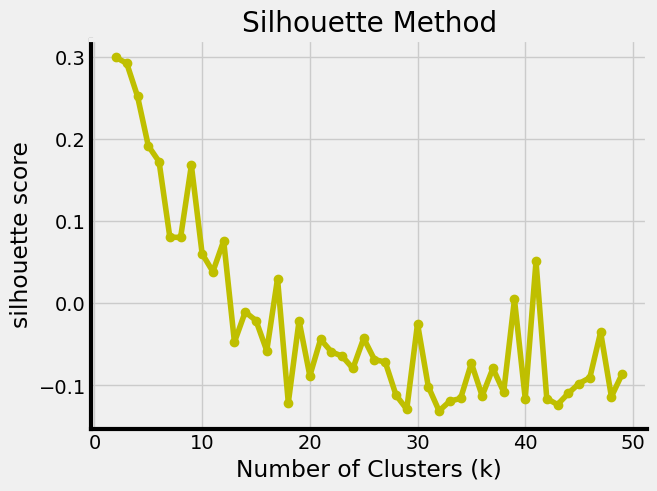

In [44]:
fig, ax = plt.subplots(1)

ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black')

ax.plot(range(2, k_range), silhouette_avg_n_clusters, '-o', c = 'y')
ax.xaxis.get_major_locator().set_params(integer=True)

plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.title("Silhouette Method", c = 'black')
plt.show()

In [ ]:
sc = SpectralClustering(n_clusters=41, n_init=13)

sc.fit(df)

# Results
* Since our data is high dimensional, and k_means clustering fails in high dimensional data due the 'curse of dimensionality', we are using spectral analysis that perform better with high dimensional data.
* K-means algorithm that clusters are spherical within k-radius from the cluster centroid. In K means, many iterations are required to determine the cluster centroid. In spectral, the clusters do not follow a fixed shape or pattern. 
* We can see from both Eigengap heuristics and Silhouette method that the optimal number of clusters is 41 (ignore lower values), which means our data contains 41 clusters according to this algorithm.